In [1]:
# import statements
datapath = 'datasets/'
from autograd import numpy as np

In [8]:
from autograd import grad 

# gradient descent function 
def gradient_descent(g,alpha,max_its,w):
    # compute gradient module using autograd
    gradient = grad(g)

    # run the gradient descent loop
    weight_history = [w] # weight history container
    cost_history = [g(w)] # cost function history container
    for k in range(max_its):
        # evaluate the gradient
        grad_eval = gradient(w)

        # take gradient descent step
        w = w - alpha*grad_eval
        
        # record weight and cost
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

In [29]:
# the import statement for matplotlib
import matplotlib.pyplot as plt

# cost function history plotter
def plot_cost_histories(cost_histories,labels):
    # create figure
    plt.figure()
    # loop over cost histories and plot each one
    for j in range(len(cost_histories)):
        history = cost_histories[j]
        label = labels[j]
        plt.plot(history,label = label)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

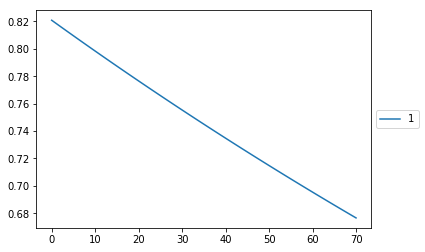

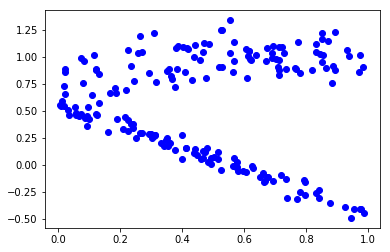

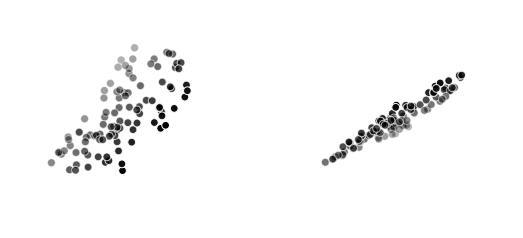

In [40]:
# load in dataset
csvname = datapath + 'linear_2output_regression.csv'
data = np.loadtxt(csvname,delimiter=',')

# get input and output of dataset
x = data[:2,:]
y = data[2:,:]
w = 0.1*np.random.randn(3,2); 
g = least_squares
weight_history,cost_history = gradient_descent(g,0.001,70,w)
plot_cost_histories([cost_history],labels = ["1"])
weight_history[-1]
yfit = model(x,weight_history[-1])
plt.figure()
plt.plot(x,y,'bo')
plt.show()
plot_data(x,yfit)

In [22]:
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

In [6]:
def least_squares(w):
    cost = np.sum((model(x,w) - y)**2) 
    return cost/float(np.size(y))

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt 
from autograd import numpy as np
def plot_data(x,y):
    # construct panels
    fig = plt.figure(figsize = (9,4))
    ax0 = plt.subplot(121,projection='3d')
    ax0.view_init(25,45)
    ax0.axis('off')

    ax1 = plt.subplot(122,projection='3d')
    ax1.view_init(25,45)
    ax1.axis('off')

    # scatter plot data in each panel
    ax0.scatter(x[0,:],x[1,:],y[0,:],c='k',edgecolor = 'w',linewidth = 1,s=60)
    ax1.scatter(x[0,:],x[1,:],y[1,:],c='k',edgecolor = 'w',linewidth = 1,s=60)
    plt.show()